## Working notebook for CA Increase/Decrease Data Studio dashboard

#### Prepared by Jeanna Schoonmaker

In [173]:
import tabula
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

#### Loading 2014 data tables, using tabula to convert tables found in pdf file to csv, then adding 2014 to 2015-2019 data on the state column. This is first done with tables base on number of child abuse victims reported per state per year, then on data tables of child fatalities reported per state per year

#### Source of datasets: https://healthdata.gov/dataset/national-child-abuse-and-neglect-data-system-ncands-child-file

In [174]:
df_2014 = pd.read_csv(r'C:\users\j\desktop\child_2014_fatalities.csv')
df_2014 = df_2014.dropna(axis=1)

In [175]:
df_2014_vic = pd.read_csv(r'C:\users\j\desktop\child_2014_victims.csv')
df_2014_vic = df_2014_vic.dropna(axis=1)

In [176]:
file = r'C:\users\j\desktop\cm2019.pdf'

In [177]:
tabula.convert_into(file, "cm2019victims.csv", pages=52)

Got stderr: Jan 21, 2021 5:57:32 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile
Jan 21, 2021 5:57:32 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile
Jan 21, 2021 5:57:32 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile



In [178]:
df_victims = pd.read_csv(r'c:/users/j/desktop/projects/sia/cm2019victims.csv', encoding='cp1252')

In [179]:
df_victims = df_victims.drop('Table 3–4 Victims, 2015–2019 (continues next page)', axis=1)
df_victims = df_victims.drop(df_victims.index[[0, 1]]).reset_index(drop=True)
df_victims = df_victims.drop(df_victims.index[53])
df_victims['2014']= df_2014_vic['2014']
df_victims.columns = ['State', '2014', '2015', '2016', '2017', '2018', '2019']
df_victims = df_victims.replace(to_replace =',', value = '', regex = True)
df_victims = df_victims.replace(to_replace='-', value= 0, regex=True)
df_victims = df_victims.astype({'2014': int, '2015': int, '2016': int, '2017': int, '2018': int, '2019': int})
df_victims

,State,2014,2015,2016,2017,2018,2019
0,Alabama,8466,10157,10847,12158,11677,8697
1,Alaska,2898,3142,2783,2615,3059,2484
2,Arizona,11955,10841,9909,15504,12847,13877
3,Arkansas,9204,9707,9334,8538,8422,8971
4,California,72000,68663,65342,63795,64115,75033
5,Colorado,10100,11226,11578,11879,12246,9979
6,Connecticut,6930,7903,8442,7652,8042,7651
7,Delaware,1538,1572,1542,1251,1248,1482
8,District of Columbia,1348,1366,1639,1699,1857,1528
9,Florida,43775,41894,40103,36795,32915,45738


#### Total increase or decrease of child abuse victims per state per year is calculated, then all yearly increases or decreases are added together, given an indication of whether a state has an overall trend of an increase in the number of child abuse victims, or a decrease

In [180]:
df_victims['14-15'] = df_victims['2015'] - df_victims['2014']
df_victims['15-16'] = df_victims['2016'] - df_victims['2015']
df_victims['16-17'] = df_victims['2017'] - df_victims['2016']
df_victims['17-18'] = df_victims['2018'] - df_victims['2017']
df_victims['18-19'] = df_victims['2019'] - df_victims['2018']

In [181]:
df_victims['14-19 Total'] = df_victims['14-15'] + df_victims['15-16'] + df_victims['16-17'] + df_victims['17-18']+ df_victims['18-19']

In [182]:
#if the 14-19 Total number is positive, that means there were more years with increases in child victims
#than years with decreases during the 2014-2019 timeframe, so a 1 is assigned to that state showing it overall had 
#more increases. If the number is negative, a 0 is assigned. Currently using raw data instead of the binary, but
#future exploration could use the binary trend instead of raw data.

df_victims['Overall Increase'] = df_victims['14-19 Total'].apply(lambda x: 1 if x > 0 else 0)
df_victims

,State,2014,2015,2016,2017,2018,2019,14-15,15-16,16-17,17-18,18-19,14-19 Total,Overall Increase
0,Alabama,8466,10157,10847,12158,11677,8697,1691,690,1311,-481,-2980,231,1
1,Alaska,2898,3142,2783,2615,3059,2484,244,-359,-168,444,-575,-414,0
2,Arizona,11955,10841,9909,15504,12847,13877,-1114,-932,5595,-2657,1030,1922,1
3,Arkansas,9204,9707,9334,8538,8422,8971,503,-373,-796,-116,549,-233,0
4,California,72000,68663,65342,63795,64115,75033,-3337,-3321,-1547,320,10918,3033,1
5,Colorado,10100,11226,11578,11879,12246,9979,1126,352,301,367,-2267,-121,0
6,Connecticut,6930,7903,8442,7652,8042,7651,973,539,-790,390,-391,721,1
7,Delaware,1538,1572,1542,1251,1248,1482,34,-30,-291,-3,234,-56,0
8,District of Columbia,1348,1366,1639,1699,1857,1528,18,273,60,158,-329,180,1
9,Florida,43775,41894,40103,36795,32915,45738,-1881,-1791,-3308,-3880,12823,1963,1


#### All steps completed for the child abuse victims per state will now be done on the data tables that count number of child fatalities per state

In [183]:
tabula.convert_into(file, "cm2019fatalities.csv", pages=78)

Got stderr: Jan 21, 2021 5:58:05 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile
Jan 21, 2021 5:58:05 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile
Jan 21, 2021 5:58:05 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile



In [184]:
df = pd.read_csv(r'c:/users/j/desktop/projects/sia/cm2019fatalities.csv', encoding='cp1252')

In [185]:
df = df.drop('Table 4–2 Child Fatalities, 2015–2019', axis=1)
df = df.drop(df.index[[0,1]]).reset_index(drop=True)
df = df.drop(df.index[53])
df['2014'] = df_2014['2014']
df.columns = ['State', '2014', '2015', '2016', '2017', '2018', '2019']
df = df.replace(to_replace =',', value = '', regex = True)
df = df.replace(to_replace='-', value= 0, regex=True)
df = df.astype({'2014': int, '2015': int, '2016': int, '2017': int, '2018': int, '2019': int})
df

,State,2014,2015,2016,2017,2018,2019
0,Alabama,13,26,28,43,34,17
1,Alaska,5,1,2,2,1,3
2,Arizona,51,48,35,48,33,40
3,Arkansas,40,42,37,44,35,21
4,California,127,137,147,145,149,134
5,Colorado,19,37,35,40,25,20
6,Connecticut,11,5,11,8,4,13
7,Delaware,1,0,4,4,13,5
8,District of Columbia,3,3,4,5,3,3
9,Florida,124,110,101,111,114,138


In [186]:
df['14-15'] = df['2015'] - df['2014']
df['15-16'] = df['2016'] - df['2015']
df['16-17'] = df['2017'] - df['2016']
df['17-18'] = df['2018'] - df['2017']
df['18-19'] = df['2019'] - df['2018']

df['14-19 Total'] = df['14-15'] + df['15-16'] + df['16-17'] + df['17-18']+ df['18-19']

df['Overall Increase'] = df['14-19 Total'].apply(lambda x: 1 if x > 0 else 0)
df

,State,2014,2015,2016,2017,2018,2019,14-15,15-16,16-17,17-18,18-19,14-19 Total,Overall Increase
0,Alabama,13,26,28,43,34,17,13,2,15,-9,-17,4,1
1,Alaska,5,1,2,2,1,3,-4,1,0,-1,2,-2,0
2,Arizona,51,48,35,48,33,40,-3,-13,13,-15,7,-11,0
3,Arkansas,40,42,37,44,35,21,2,-5,7,-9,-14,-19,0
4,California,127,137,147,145,149,134,10,10,-2,4,-15,7,1
5,Colorado,19,37,35,40,25,20,18,-2,5,-15,-5,1,1
6,Connecticut,11,5,11,8,4,13,-6,6,-3,-4,9,2,1
7,Delaware,1,0,4,4,13,5,-1,4,0,9,-8,4,1
8,District of Columbia,3,3,4,5,3,3,0,1,1,-2,0,0,0
9,Florida,124,110,101,111,114,138,-14,-9,10,3,24,14,1


#### Datasets are merged using the state column

In [187]:
df_all = pd.merge(df, df_victims, on='State')
df_all = df_all.drop(df_all.index[52])
df_all

,State,2014_x,2015_x,2016_x,2017_x,2018_x,2019_x,14-15_x,15-16_x,16-17_x,...,2017_y,2018_y,2019_y,14-15_y,15-16_y,16-17_y,17-18_y,18-19_y,14-19 Total_y,Overall Increase_y
0,Alabama,13,26,28,43,34,17,13,2,15,...,12158,11677,8697,1691,690,1311,-481,-2980,231,1
1,Alaska,5,1,2,2,1,3,-4,1,0,...,2615,3059,2484,244,-359,-168,444,-575,-414,0
2,Arizona,51,48,35,48,33,40,-3,-13,13,...,15504,12847,13877,-1114,-932,5595,-2657,1030,1922,1
3,Arkansas,40,42,37,44,35,21,2,-5,7,...,8538,8422,8971,503,-373,-796,-116,549,-233,0
4,California,127,137,147,145,149,134,10,10,-2,...,63795,64115,75033,-3337,-3321,-1547,320,10918,3033,1
5,Colorado,19,37,35,40,25,20,18,-2,5,...,11879,12246,9979,1126,352,301,367,-2267,-121,0
6,Connecticut,11,5,11,8,4,13,-6,6,-3,...,7652,8042,7651,973,539,-790,390,-391,721,1
7,Delaware,1,0,4,4,13,5,-1,4,0,...,1251,1248,1482,34,-30,-291,-3,234,-56,0
8,District of Columbia,3,3,4,5,3,3,0,1,1,...,1699,1857,1528,18,273,60,158,-329,180,1
9,Florida,124,110,101,111,114,138,-14,-9,10,...,36795,32915,45738,-1881,-1791,-3308,-3880,12823,1963,1


#### Basic visualizations shown

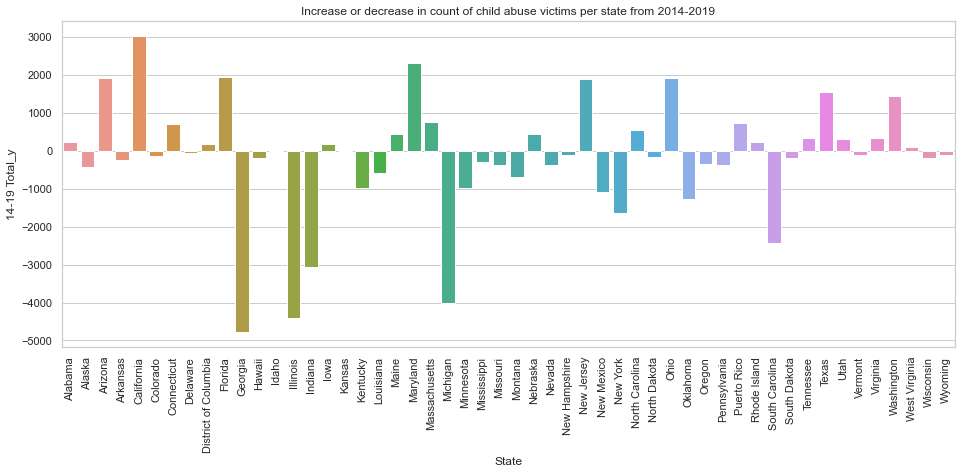

In [188]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))
sns.barplot(x="State", y="14-19 Total_y", data=df_all).set_title('Increase or decrease in count of child abuse victims per state from 2014-2019')
plt.xticks(rotation=90)
plt.show()

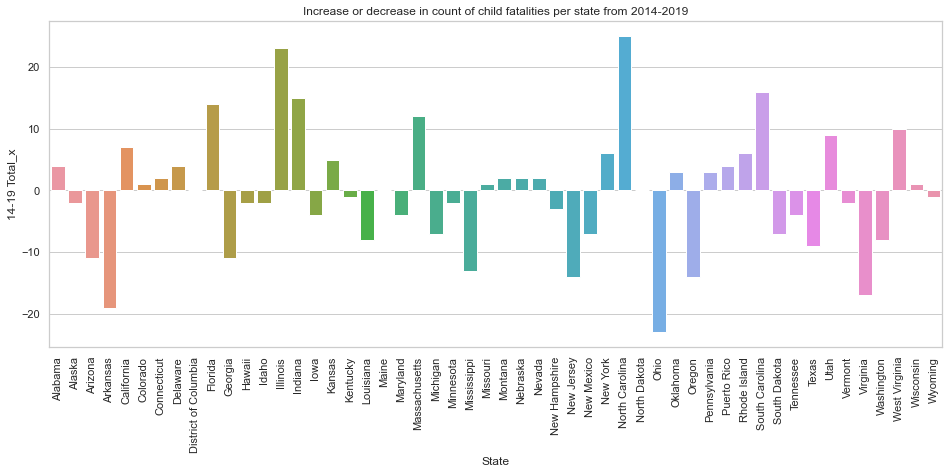

In [189]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))
sns.barplot(x="State", y="14-19 Total_x", data=df_all).set_title('Increase or decrease in count of child fatalities per state from 2014-2019')
plt.xticks(rotation=90)
plt.show()

### Standardizing the total year over year increase/decrease in child abuse victim count and child fatalities for 2014-2019 per state for data visualization purposes, then saving dataframe to a csv for use as Google Data Studio source data


In [190]:
from sklearn import preprocessing
# Get column names first
cols = df_all[['14-19 Total_x', '14-19 Total_y']]
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(cols)
scaled_df = pd.DataFrame(scaled_df, columns=['14-19_victims', '14-19_fatalities'])
df_all['scaled_victims'] = scaled_df['14-19_victims']
df_all['scaled_fatalities'] = scaled_df['14-19_fatalities']
df_all

,State,2014_x,2015_x,2016_x,2017_x,2018_x,2019_x,14-15_x,15-16_x,16-17_x,...,2019_y,14-15_y,15-16_y,16-17_y,17-18_y,18-19_y,14-19 Total_y,Overall Increase_y,scaled_victims,scaled_fatalities
0,Alabama,13,26,28,43,34,17,13,2,15,...,8697,1691,690,1311,-481,-2980,231,1,0.452467,0.252218
1,Alaska,5,1,2,2,1,3,-4,1,0,...,2484,244,-359,-168,444,-575,-414,0,-0.172178,-0.174938
2,Arizona,51,48,35,48,33,40,-3,-13,13,...,13877,-1114,-932,5595,-2657,1030,1922,1,-1.109145,1.372097
3,Arkansas,40,42,37,44,35,21,2,-5,7,...,8971,503,-373,-796,-116,549,-233,0,-1.942005,-0.055069
4,California,127,137,147,145,149,134,10,10,-2,...,75033,-3337,-3321,-1547,320,10918,3033,1,0.764790,2.107865
5,Colorado,19,37,35,40,25,20,18,-2,5,...,9979,1126,352,301,367,-2267,-121,0,0.140145,0.019104
6,Connecticut,11,5,11,8,4,13,-6,6,-3,...,7651,973,539,-790,390,-391,721,1,0.244252,0.576725
7,Delaware,1,0,4,4,13,5,-1,4,0,...,1482,34,-30,-291,-3,234,-56,0,0.452467,0.062150
8,District of Columbia,3,3,4,5,3,3,0,1,1,...,1528,18,273,60,158,-329,180,1,0.036037,0.218443
9,Florida,124,110,101,111,114,138,-14,-9,10,...,45738,-1881,-1791,-3308,-3880,12823,1963,1,1.493542,1.399249


In [192]:
df_all.to_csv(r'c:\users\j\desktop\2014-2019data.csv')